<a href="https://colab.research.google.com/github/Chrstphr1995/BDA_Project/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock

Stock Price [Link](https://www.youtube.com/watch?v=2BrpKpWwT2A)

In [1]:
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [2]:
style.use('ggplot')

In [3]:
start = dt.datetime(2020,1,1)
end = str(datetime.now().strftime('%Y-%m-%d'))
#end = dt.datetime(now())

In [4]:
full = web.DataReader('D7G.F', 'yahoo', start, end)
print(full.head())

              High     Low   Open  Close   Volume  Adj Close
Date                                                        
2020-01-02  0.9220  0.8895  0.897  0.922  1614564      0.922
2020-01-03  0.9230  0.8670  0.923  0.881  2356047      0.881
2020-01-06  0.8820  0.8250  0.882  0.868  1462875      0.868
2020-01-07  0.8885  0.8600  0.865  0.869  1002937      0.869
2020-01-08  0.8800  0.8430  0.860  0.880  1071671      0.880


In [5]:
#df = pd.DataFrame(full)
#df.to_excel('Stock.xlsx')

In [6]:
#df = pd.DataFrame(RSI)
#df.to_excel('Stock.xlsx')

In [7]:
Stock = full['Close']
#print(Stock)



---



SMA_20 & SMA_100

In [8]:
SMA_20 = Stock.rolling(window=20).mean()
#print(SMA_20)

In [9]:
SMA_100 = Stock.rolling(window=100).mean()
#print(SMA_100)

In [10]:
#df7 = pd.concat([Stock, SMA_20, SMA_100], axis=1)
#print(df7)

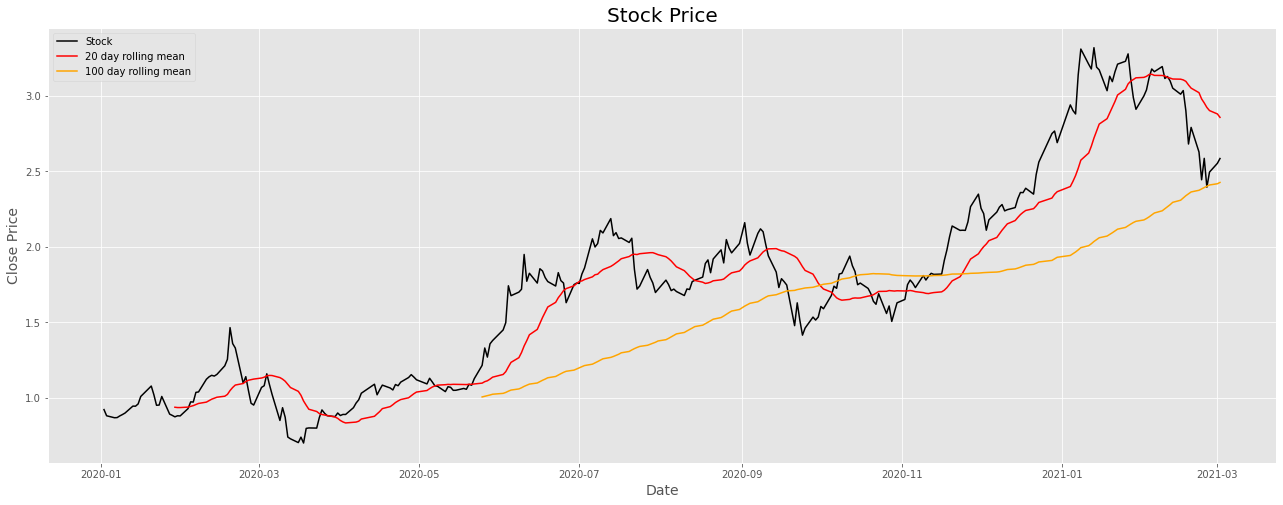

In [18]:
  plt.subplots(figsize=(22,8))
  plt.plot(Stock, label='Stock', color='black')
  plt.plot(SMA_20, label='20 day rolling mean', color='red')
  plt.plot(SMA_100, label='100 day rolling mean', color='orange')
  plt.xlabel('Date', size=14)
  plt.ylabel('Close Price', size=14)
  plt.legend()
  plt.title('Stock Price', size=20)
  plt.show()



---



[RSI](https://tcoil.info/compute-rsi-for-stocks-with-python-relative-strength-index/)

In [12]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()

    up_chg = 0 * diff
    down_chg = 0 * diff
    
    up_chg[diff > 0] = diff[ diff>0 ]
    
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [15]:
RSI = computeRSI(full['Adj Close'], 14)

In [ ]:
#RSI = df['RSI']

In [16]:
print(RSI)

Date
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
                ...    
2021-02-24    37.555418
2021-02-25    32.545798
2021-02-26    37.264237
2021-03-01    39.890546
2021-03-02    41.349393
Name: Adj Close, Length: 295, dtype: float64


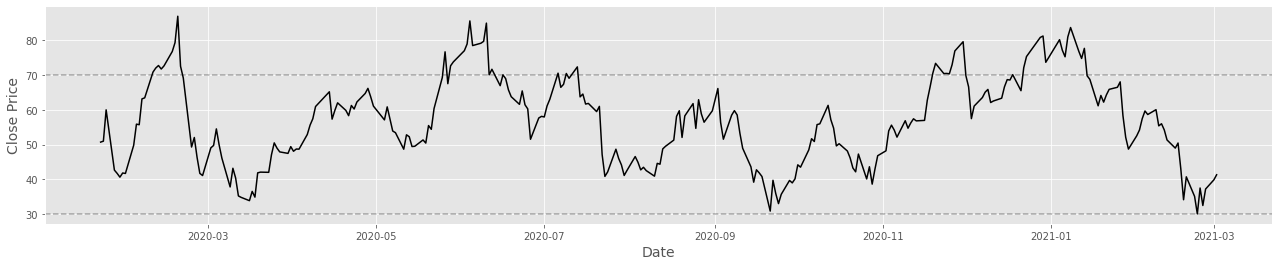

In [17]:
plt.subplots(figsize=(22,4))
plt.plot(RSI, label='Apple', color='black')
plt.xlabel('Date', size=14)
plt.ylabel('Close Price', size=14)
plt.axhline(30, linestyle='--', color='black', alpha=0.3)
plt.axhline(70, linestyle='--', color='black', alpha=0.3)
#plt.title('Apple Stock', size=20)
plt.show()



---



# Dashbaord

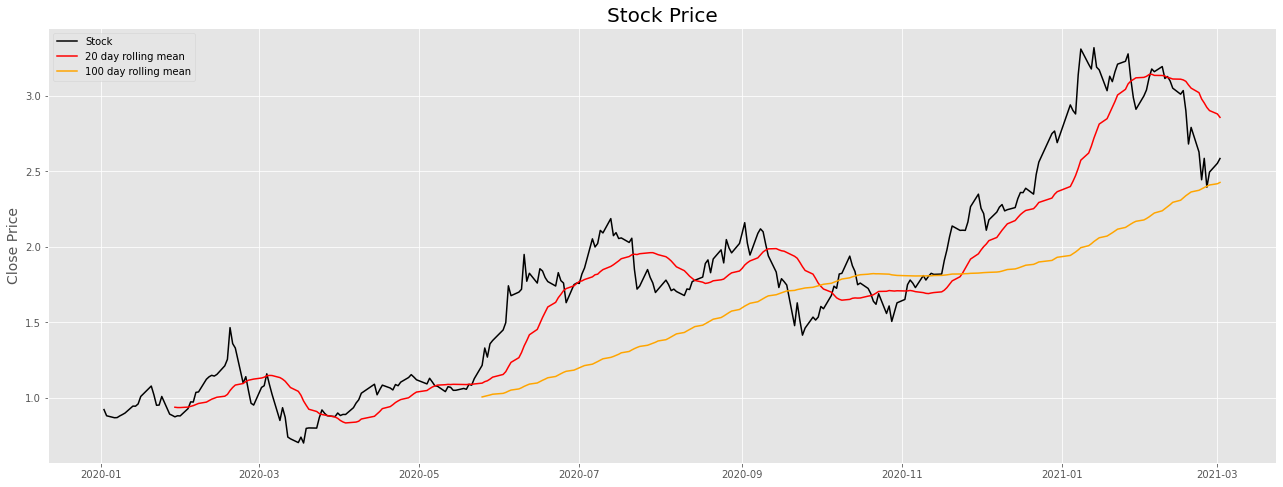

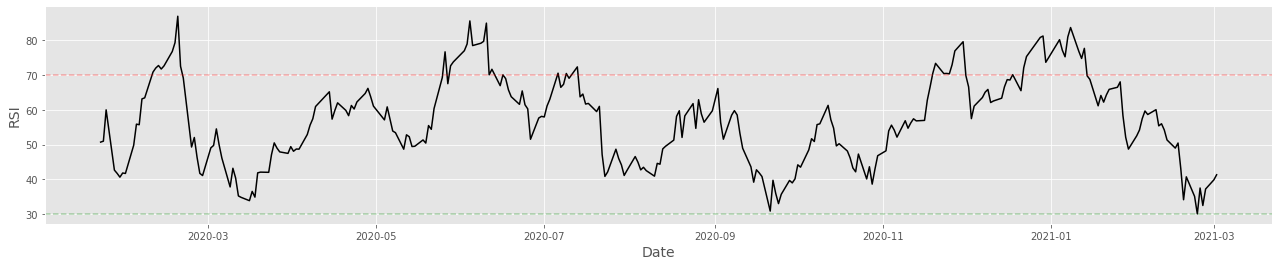

In [32]:
plt.subplots(figsize=(22,8))
plt.plot(Stock, label='Stock', color='black')
plt.plot(SMA_20, label='20 day rolling mean', color='red')
plt.plot(SMA_100, label='100 day rolling mean', color='orange')
#plt.xlabel('Date', size=14)
plt.ylabel('Close Price', size=14)
plt.legend()
plt.title('Stock Price', size=20)
plt.show()

plt.subplots(figsize=(22,4))
plt.plot(RSI, label='Stock', color='black')
plt.xlabel('Date', size=14)
plt.ylabel('RSI', size=14)
plt.axhline(30, linestyle='--', color='green', alpha=0.3)
plt.axhline(70, linestyle='--', color='red', alpha=0.3)
#plt.title('Apple Stock', size=20)
plt.show()

#Backlog

Requirements

In [ ]:
pip install pandas-datareader

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install datetime

In [ ]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import plotly as py
import plotly.graph_objs as go



---



Close vs. SMA 20 & SMA 200

In [ ]:
#Year-Month-Day
START_DATE = '2019-01-01'

In [ ]:
END_DATE = str(datetime.now().strftime('%Y-%m-%d'))

In [ ]:
#UK_Stock = 'UU.L'

In [ ]:
USA_Stock = 'AAPL'

In [ ]:
def get_stats(stock_data):
  return {
          'last': np.mean(stock_data.tail(1)),
          'short_mean': np.mean(stock_data.tail(20)),
          'long_mean': np.mean(stock_data.tail(200)),
          'short_rolling': stock_data.rolling(window=20).mean(),
          'long_rolling': stock_data.rolling(window=200).mean()
  }

In [ ]:
def clean_data(stock_data, col):
  weekdays = pd.date_range(start=START_DATE, end=END_DATE)
  clean_data = stock_data[col].reindex(weekdays)
  return clean_data.fillna(method='ffill')

In [ ]:
def create_plot(stock_data, ticker):
  stats = get_stats(stock_data)
  plt.subplots(figsize=(22,8))
  plt.plot(stock_data, label=ticker)
  plt.plot(stats['short_rolling'], label='20 day rolling mean')
  plt.plot(stats['long_rolling'], label='200 day rolling mean')
  plt.xlabel('Date')
  plt.ylabel('Close Price')
  plt.legend()
  plt.title('Apple')
  plt.show()

In [ ]:
def get_data(ticker):
  
  try:
    stock_data = data.DataReader(ticker,
                                 'yahoo',
                                 START_DATE,
                                 END_DATE)
    Close = (clean_data(stock_data, 'Close'))
    create_plot(Close, ticker)

  except RemoteDataError:
      print('No data found for [t]'.format(t=ticker))

#get_data(USA_Stock)



---



Volume

In [ ]:
START_DATE = '2019-01-01'

In [ ]:
END_DATE = str(datetime.now().strftime('%Y-%m-%d'))

In [ ]:
USA_Stock = 'AAPL'

In [ ]:
def clean_data(stock_data, col):
  weekdays = pd.date_range(start=START_DATE, end=END_DATE)
  clean_data = stock_data[col].reindex(weekdays)
  return clean_data.fillna(method='ffill')

In [ ]:
def create_plot(stock_data, ticker):
  stats = get_stats(stock_data)
  plt.subplots(figsize=(22,2))
  plt.plot(stock_data, label=ticker)
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.legend()
  plt.title('Apple Volume')
  plt.show()

In [ ]:
def get_volume(ticker):
  
  try:
    stock_data = data.DataReader(ticker,
                                 'yahoo',
                                 START_DATE,
                                 END_DATE)
    Volume = (clean_data(stock_data, 'Volume'))
    create_plot(Volume, ticker)

  except RemoteDataError:
      print('No data found for [t]'.format(t=ticker))

  get_data(USA_Stock)



---



Alpha Vantage Try

Preparations

In [ ]:
pip install alpha_vantage

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.fundamentaldata import FundamentalData
import time
from datetime import datetime

In [ ]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [ ]:
api_key = "NMO1Y2U90QAJBJ2V"



---



Fundamental Data

In [ ]:
ta = FundamentalData(key=api_key, output_format='pandas')
data_ta, meta_data_ta = ta.get_company_overview(symbol='AAPL')

In [ ]:
print(data_ta)

In [ ]:
dfSAP = data_ta['AnalystTargetPrice']
print(dfSAP)

In [ ]:
df = pd.DataFrame(dfSAP)
df.to_excel('Analystenschätzung.xlsx')



---



Try with Apple

https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

In [ ]:
ta = TimeSeries(key=api_key, output_format='pandas')
data_ta, meta_data_ta = ta.get_daily(symbol='AAPL', outputsize='full')

In [ ]:
print(close[::-1])

In [ ]:
#df = pd.DataFrame(close[::-1])
#df.to_csv('Apple_Price.csv')

In [ ]:
df = pd.DataFrame(close[::-1])
df.to_excel('Apple_Price.xlsx')